In [1]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import tensorflow


In [2]:
nfl=pd.read_csv('nfl_v5.csv', low_memory=False)

In [3]:
nfl.posteam.unique()

array(['PIT', 'TEN', nan, 'CLE', 'MIN', 'NO', 'DET', 'DAL', 'TB', 'HOU',
       'NYJ', 'IND', 'JAC', 'DEN', 'CIN', 'CAR', 'PHI', 'KC', 'BAL',
       'ATL', 'MIA', 'ARI', 'SF', 'STL', 'SEA', 'NYG', 'WAS', 'GB', 'CHI',
       'NE', 'BUF', 'OAK', 'SD', 'LA', 'JAX', 'LAC'], dtype=object)

In [4]:
index=[('ARI',1),('ATL',2),('BAL',3),('BUF',4),('CAR',5),('CHI',6),('CIN',7),('CLE',8),('DAL',9),
       ('DEN',10),('DET',11),('GB',12),('HOU',13),('IND',14),('JAC',15),('JAX',15),('KC',16),('LA',17),
       ('LAC',18),('MIA',19),('MIN',20),('NE',21),('NO',22),('NYG',23),('NYJ',24),('OAK',25),
       ('PHI',26),('PIT',27),('SD',18),('SEA',28),('SF',29),('STL',17),('TB',30),('TEN',31),('WAS',32)]

In [9]:
    def team_index(df,column):
        for i , row in df.iterrows():
            team_val=df.at[i, column]
            for x in index:
                if df.at[i,column]==x[0]:
                    team_val=x[1]
                df.at[i,column]=team_val
        return df

In [10]:
n_fl=team_index(nfl,'posteam')

In [12]:
len(n_fl.posteam.unique())

33

In [64]:
nf_l=n_fl[['posteam','game_id','ydstogo','yardline_100','play_type',
           'game_seconds_remaining','down','ydsnet']].copy()

In [65]:
def _sorter(df,column,list_):
    temp_list=[]
    for i in range(len(list_)):
        new_frame=df.loc[df[column]==list_[i]]
        temp_list.append(new_frame)
    df_list=temp_list[0].append(temp_list[1:])
    sorted_frame=df_list.reset_index(drop=True)
    return sorted_frame

In [66]:
plays=['pass','run','punt','feild_goal']
nfl_=_sorter(nf_l,'play_type',plays)

In [67]:
downs=[1,2,3,4]
_nfl=_sorter(nfl_,'down',downs)

In [68]:
# nfl_.posteam.dtype
_nfl

,posteam,game_id,ydstogo,yardline_100,play_type,game_seconds_remaining,down,ydsnet
0,27,2009091000,10,58.0,pass,3593.0,1.0,5
1,27,2009091000,10,43.0,pass,3384.0,1.0,3
2,31,2009091000,10,42.0,pass,3177.0,1.0,67
3,31,2009091000,10,74.0,pass,2989.0,1.0,10
4,31,2009091000,15,69.0,pass,2947.0,1.0,14
...,...,...,...,...,...,...,...,...
342600,5,2018121700,15,82.0,punt,1940.0,4.0,-5
342601,22,2018121700,10,61.0,punt,1663.0,4.0,14
342602,5,2018121700,12,85.0,punt,1602.0,4.0,-2
342603,22,2018121700,8,53.0,punt,1363.0,4.0,23


In [69]:
_nfl['play_type']=_nfl['play_type'].astype('category')
# _nfl[f'{play_type}_cat']=_nfl['play_type'].cat.codes

In [70]:
_nfl['posteam']=_nfl['posteam'].astype('int64')

In [31]:
_nfl['play_type_cat']=_nfl['play_type'].cat.codes

In [32]:
_nfl.drop(columns='play_type',inplace=True)

In [33]:
pre_pre=_nfl.sort_values(by=['game_id','game_seconds_remaining'],ascending=[True,False])

In [34]:
pre=pre_pre.dropna()

In [36]:
test=pre.reset_index(drop=True)

In [47]:
test.to_csv(r'processed_nfl_data.csv')

In [127]:
test=pd.read_csv('processed_nfl_data.csv', low_memory=False)

In [128]:
data=test[['posteam','ydstogo','yardline_100','play_type_cat','down','game_seconds_remaining','ydsnet']].copy()

In [129]:
target=test['play_type_cat'].copy()

In [130]:
dt=data.drop(data.tail(1).index)

In [131]:
tg=target.drop(target.head(1).index)

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dt, tg, random_state=42)

In [133]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5628218151248731

In [134]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6210491902810373

In [135]:
import pickle
with open('play_forest_v1.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [136]:
data.dtypes

posteam                     int64
ydstogo                     int64
yardline_100              float64
play_type_cat               int64
down                      float64
game_seconds_remaining    float64
ydsnet                      int64
dtype: object

In [123]:
posteam = int(5)
ydstogo = int(35)
yardline_100 = float(20) 
play_type_cat = int(1)
down = float(1)
game_seconds_remaining = float(180)
ydsnet = int(25)

input_variables = pd.DataFrame([[posteam,ydstogo,yardline_100,play_type_cat,down,
                                game_seconds_remaining,ydsnet]],
                                columns=['posteam', 'ydstogo','yardline_100','play_type_cat','down',
                                        'game_seconds_remaining','ydsnet'])
# prediction = model.predict(input_variables)[0]

In [124]:
input_variables

,posteam,ydstogo,yardline_100,play_type_cat,down,game_seconds_remaining,ydsnet
0,5,35,20.0,1,1.0,180.0,25


In [125]:
prediction = rf.predict(input_variables)[0]

In [126]:
print(prediction)

0


In [45]:
import pickle
with open('play_forest_v1.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [46]:
feature_names = data.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2940487666390668, 'game_seconds_remaining'),
 (0.19191849237872352, 'yardline_100'),
 (0.19066307815602826, 'ydsnet'),
 (0.15527458662477545, 'posteam'),
 (0.08766167440974165, 'down'),
 (0.060826169680408305, 'ydstogo'),
 (0.01960723211125612, 'play_type_cat')]

In [ ]:
data

k: 1, Train/Test Score: 0.997/0.474
k: 3, Train/Test Score: 0.725/0.506
k: 5, Train/Test Score: 0.669/0.512
k: 7, Train/Test Score: 0.644/0.517
k: 9, Train/Test Score: 0.627/0.522
k: 11, Train/Test Score: 0.616/0.524
k: 13, Train/Test Score: 0.607/0.526
k: 15, Train/Test Score: 0.601/0.527
k: 17, Train/Test Score: 0.596/0.528
k: 19, Train/Test Score: 0.591/0.530


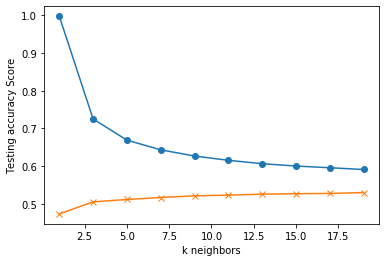

In [48]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
# tg=target.drop(target.head(1).index)

In [ ]:
X = dt
y = tg.values.reshape(-1, 1)
print(X.shape, y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [ ]:
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [ ]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [1]:
%%writefile 


UsageError: %%writefile is a cell magic, but the cell body is empty.
